## Preprocessing

In [23]:
# Import Libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_csv('Iris.csv',index_col=0)

# Select useful features
X = df[['PetalLengthCm','SepalLengthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 2

Data size:
(150, 2)


## Visualisation

Using the dendrogram and linkage function, experiment with the "method" and "metric" parameters, in order to obtain the visual 
represination of the dendigrams. Use 'single','complete' for method and 'euclidean','cityblock' for metric

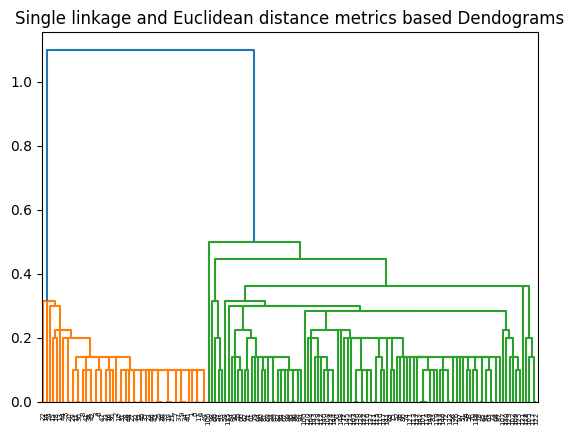

In [24]:
# Use 'single' and 'euclidean' parameters for this Hierarchical Cluster plot
plt.title("Single linkage and Euclidean distance metrics based Dendograms")  
dendogram_1 = dendrogram(linkage(X, method='single', metric='euclidean')) 

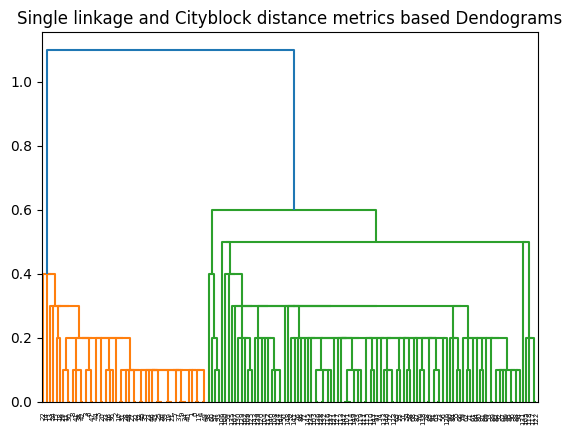

In [25]:
# Use 'single' and 'cityblock' parameters for this Hierarchical Cluster plot
plt.title("Single linkage and Cityblock distance metrics based Dendograms")  
dendogram_2 = dendrogram(linkage(X, method='single', metric='cityblock')) 

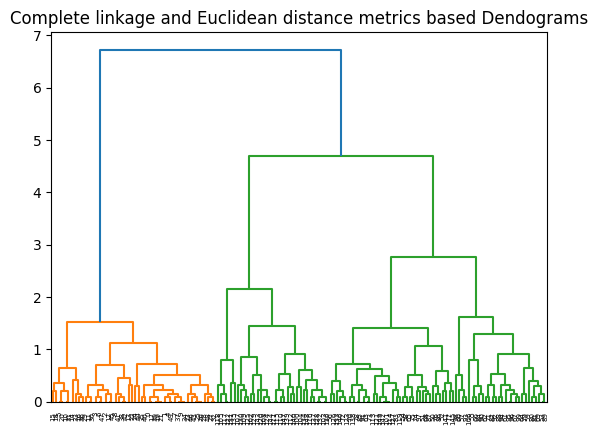

In [26]:
# Use 'complete' and 'euclidean' parameters for this Hierarchical Cluster plot
plt.title("Complete linkage and Euclidean distance metrics based Dendograms")  
dendogram_3 = dendrogram(linkage(X, method='complete', metric='euclidean')) 

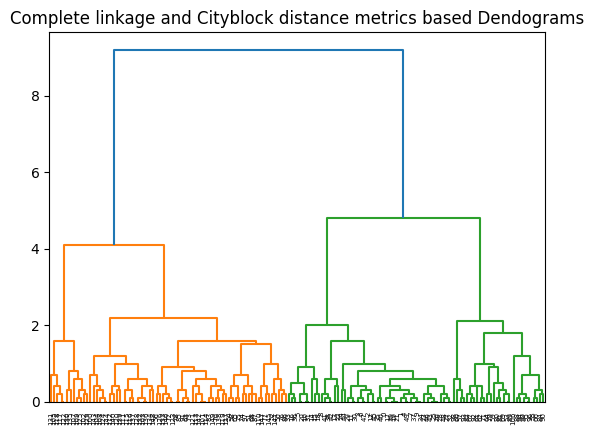

In [27]:
# Use 'complete' and 'cityblock' parameters for this Hierarchical Cluster plot
plt.title("Complete linkage and Cityblock distance metrics based Dendograms")  
dendogram_4 = dendrogram(linkage(X, method='complete', metric='cityblock')) 

## Visualisation of Clustering

I chose dendogram_3 in order to visualise the Hierarchical Clustering plot, I have specifically chosen that dendogram because of 
the more distance variance (on the y-axis) between the arrows leading to cluster, showing the bigger dissimilarity between clusters.

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


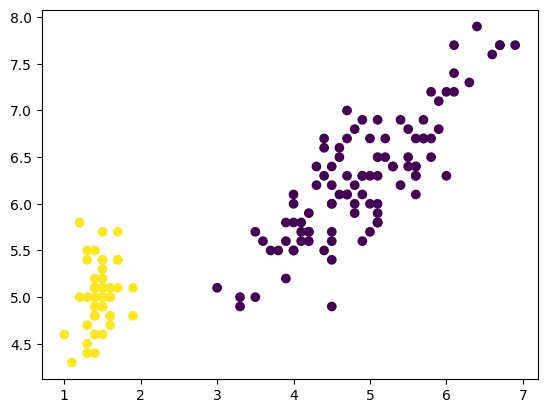

In [28]:
# Using AgglomerativeClustering function, plot a cluster plot represnting the above chosen Hierarchical Cluster plot. 
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage='complete')
cluster_1 = cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

## Silhouette Score

In [29]:
# Obtain the silhouette score using the silhouette_score function
score = round(silhouette_score(X, cluster_1, metric = 'euclidean'),2)
score

0.71

The silhouette score is close to 1, confirming what can be seen on the cluster plot (Visualisation of Clustering), that the two clusters are well-defined. The distance between clusters is greater than the average distances within the clusters itself. 